<a href="https://colab.research.google.com/github/grojasc/MIA/blob/main/Proyecto_AS_y_ANS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyecto Aprendizaje supervisado y No supervisado 💸
# Grupo 3 ▶ 
          - Nestor Borre
          - Pablo Castillo
          - Herman Granzow
          - Gonzalo Rojas

# Importar librerías en Python 🐍

In [82]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns
%matplotlib inline
import scipy.stats as st
from sklearn import ensemble, tree, linear_model
import missingno as msno
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor



# Cargar Dataset 📋

In [83]:
df = pd.read_csv("/content/drive/MyDrive/Proyecto AS y ANS/df_stack.csv",index_col=0, encoding='latin-1',header=[0])


# Análsis exploratorio 🔭 y pre-procesamiento

In [84]:

#df = df.stack(level = 0).reset_index().rename(columns = {'level_0':'Fecha', 'level_1':'País'})

#df.rename(columns=df.iloc[0]).drop(df.index[0])
#df.reset_index()
df['Fecha'] = df.index

df.head()

,País,CobIn,EPS,Estab,Pe,Peg,Psa,Pt,RevEar,Rm,Roa,Roic,T10,Vol,Fecha
Fecha,,,,,,,,,,,,,,,
01-06-2022,Al,30.409946,50.723880,3.603560,9.630703,2.111726,0.721575,-21.414190,-4.426645,-1.776966,4.555982,8.324617,1.4400,2.084092,01-06-2022
01-06-2022,Au,26.263432,136.537164,2.993252,15.052067,4.420376,1.617911,-31.039829,-7.515292,0.379201,8.133350,12.197991,3.6600,1.938329,01-06-2022
01-06-2022,Br,7.073927,54.306186,2.482950,6.258359,1.162602,0.941023,-13.350053,1.108276,-3.496322,9.584759,16.033178,13.1058,2.022834,01-06-2022
01-06-2022,Ca,72.203879,102.302330,5.244425,8.604600,1.626919,1.697559,-24.578831,-27.046469,-1.581676,1.520313,9.879633,3.2100,1.308801,01-06-2022
01-06-2022,Cl,12.088512,38.930446,2.414352,5.426070,1.568771,0.689270,14.647564,41.490459,-2.303625,7.519950,11.279389,6.4200,2.072950,01-06-2022


In [85]:
df['Fecha'] = pd.to_datetime(df['Fecha'])

In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7701 entries, 01-06-2022 to 01-02-1976
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   País    7701 non-null   object        
 1   CobIn   6803 non-null   float64       
 2   EPS     6128 non-null   float64       
 3   Estab   6782 non-null   float64       
 4   Pe      6803 non-null   float64       
 5   Peg     6793 non-null   float64       
 6   Psa     6803 non-null   float64       
 7   Pt      5020 non-null   float64       
 8   RevEar  6041 non-null   float64       
 9   Rm      6783 non-null   float64       
 10  Roa     6803 non-null   float64       
 11  Roic    6803 non-null   float64       
 12  T10     6793 non-null   float64       
 13  Vol     6802 non-null   float64       
 14  Fecha   7701 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(13), object(1)
memory usage: 962.6+ KB


In [87]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CobIn,6803.0,32.510347,51.931801,0.665952,8.693044,15.089425,31.273601,627.732860
EPS,6128.0,29.997665,28.842974,-10.103797,8.823034,22.106225,42.422493,234.925811
Estab,6782.0,3.308091,1.201164,0.009524,2.483805,3.228883,3.921828,9.207210
Pe,6803.0,20.249800,262.842512,-14184.397160,13.222107,16.800886,22.036672,15921.031680
Peg,6793.0,2.094715,1.413519,0.010759,1.272007,1.838419,2.571351,28.002936
Psa,6803.0,1.326773,0.702598,0.076464,0.849881,1.195154,1.602657,6.480503
Pt,5020.0,13.101252,25.271817,-100.000000,-3.098893,14.343140,30.917169,100.000000
RevEar,6041.0,-1.678584,18.465889,-100.000000,-12.063726,-1.696429,8.069536,100.000000
Rm,6783.0,0.842369,7.438179,-47.258256,-3.094206,1.046816,4.885085,67.393365
Roa,6803.0,5.787333,2.755128,-4.743361,3.788673,5.489224,7.548610,18.212480


In [88]:
#últimos 12 años
df = df[(df['Fecha'].dt.year >2010)&((df['Fecha'].dt.month==1)|(df['Fecha'].dt.month==6)|(df['Fecha'].dt.month==12))]

In [89]:
df.isna().sum()

País      0
CobIn     0
EPS       0
Estab     0
Pe        0
Peg       0
Psa       0
Pt        0
RevEar    0
Rm        0
Roa       0
Roic      0
T10       0
Vol       0
Fecha     0
dtype: int64

In [90]:
df['key'] = df['País'] +' ' +df['Fecha'].astype('str')

In [91]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CobIn,2760.0,50.066309,70.312049,3.722248,12.532355,22.385480,55.152411,627.732860
EPS,2760.0,44.860548,32.094595,-10.103797,22.307500,38.110442,57.820312,234.925811
Estab,2760.0,3.815884,1.336261,0.624742,2.984543,3.668287,4.389317,9.207210
Pe,2760.0,17.800640,11.706334,-144.107585,13.140572,16.156717,20.372613,224.271566
Peg,2760.0,2.367877,1.008737,0.073016,1.648715,2.218738,2.933061,11.140627
Psa,2760.0,1.330049,0.547808,0.362295,0.922602,1.250917,1.613285,4.765626
Pt,2760.0,13.073672,24.141243,-73.754049,-3.519544,13.162566,30.429737,95.727919
RevEar,2760.0,-4.260928,19.049365,-91.176805,-15.598141,-4.834922,5.318698,83.199951
Rm,2760.0,0.404570,6.232008,-37.949295,-2.974455,0.656677,3.920873,29.215123
Roa,2760.0,5.532595,2.296260,0.654255,4.052329,5.380704,7.046462,13.137489


In [92]:
df.shape

(2760, 16)

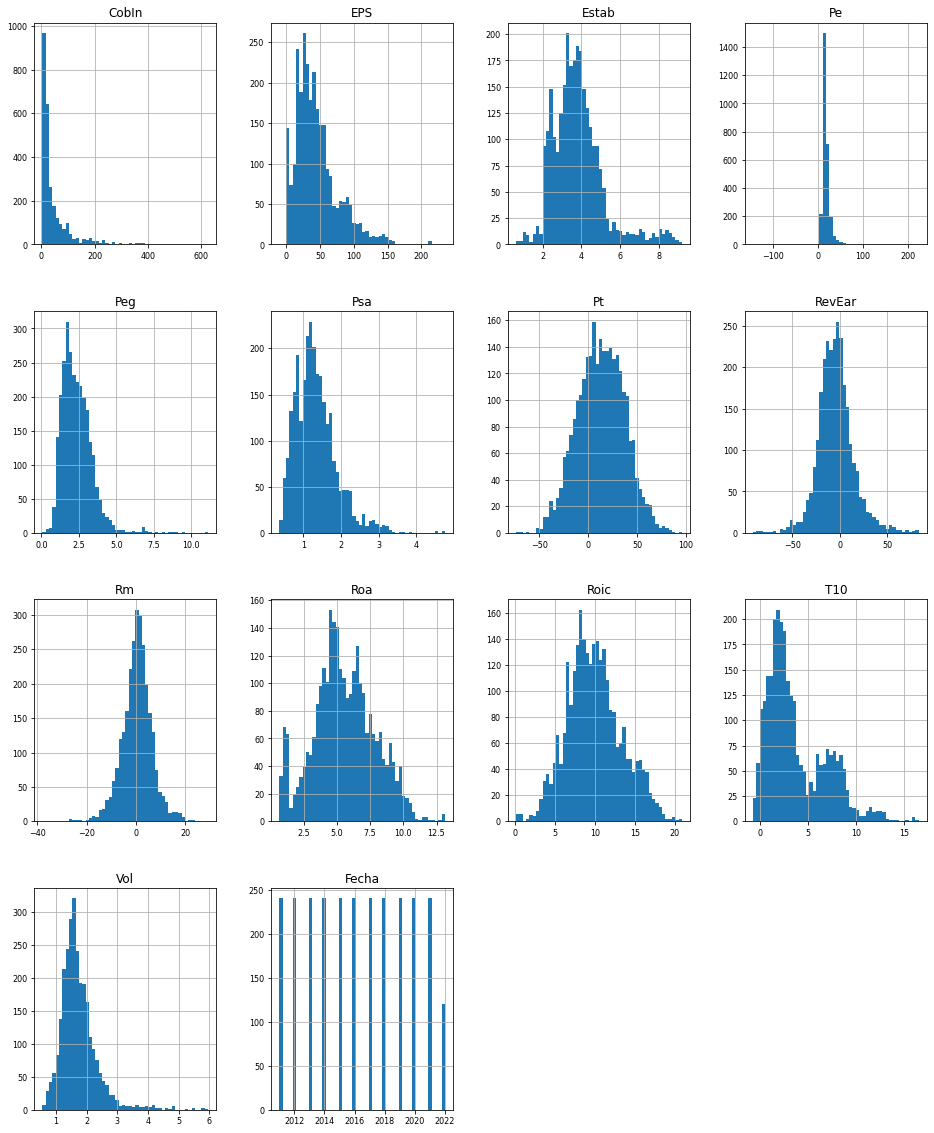

In [14]:
df.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);

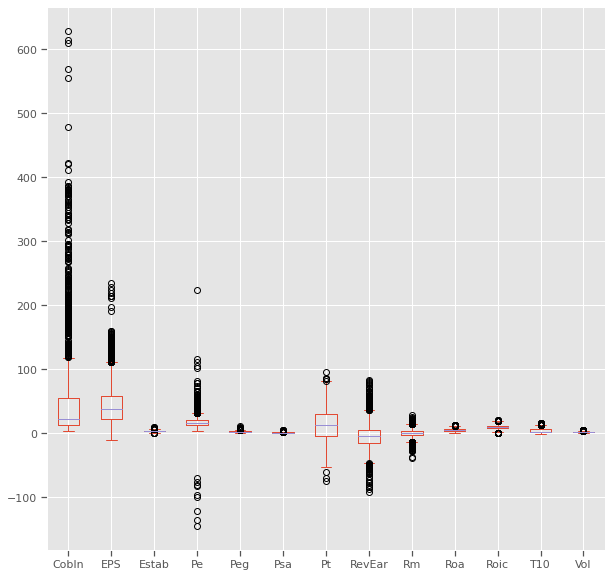

In [93]:
df.plot.box(figsize = (10,10))

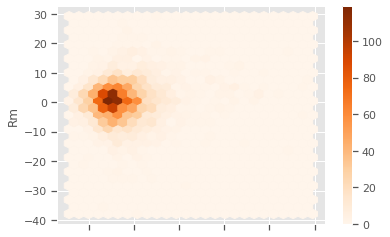

In [94]:
df.plot.hexbin(x='Vol',y='Rm',gridsize=25,cmap='Oranges');

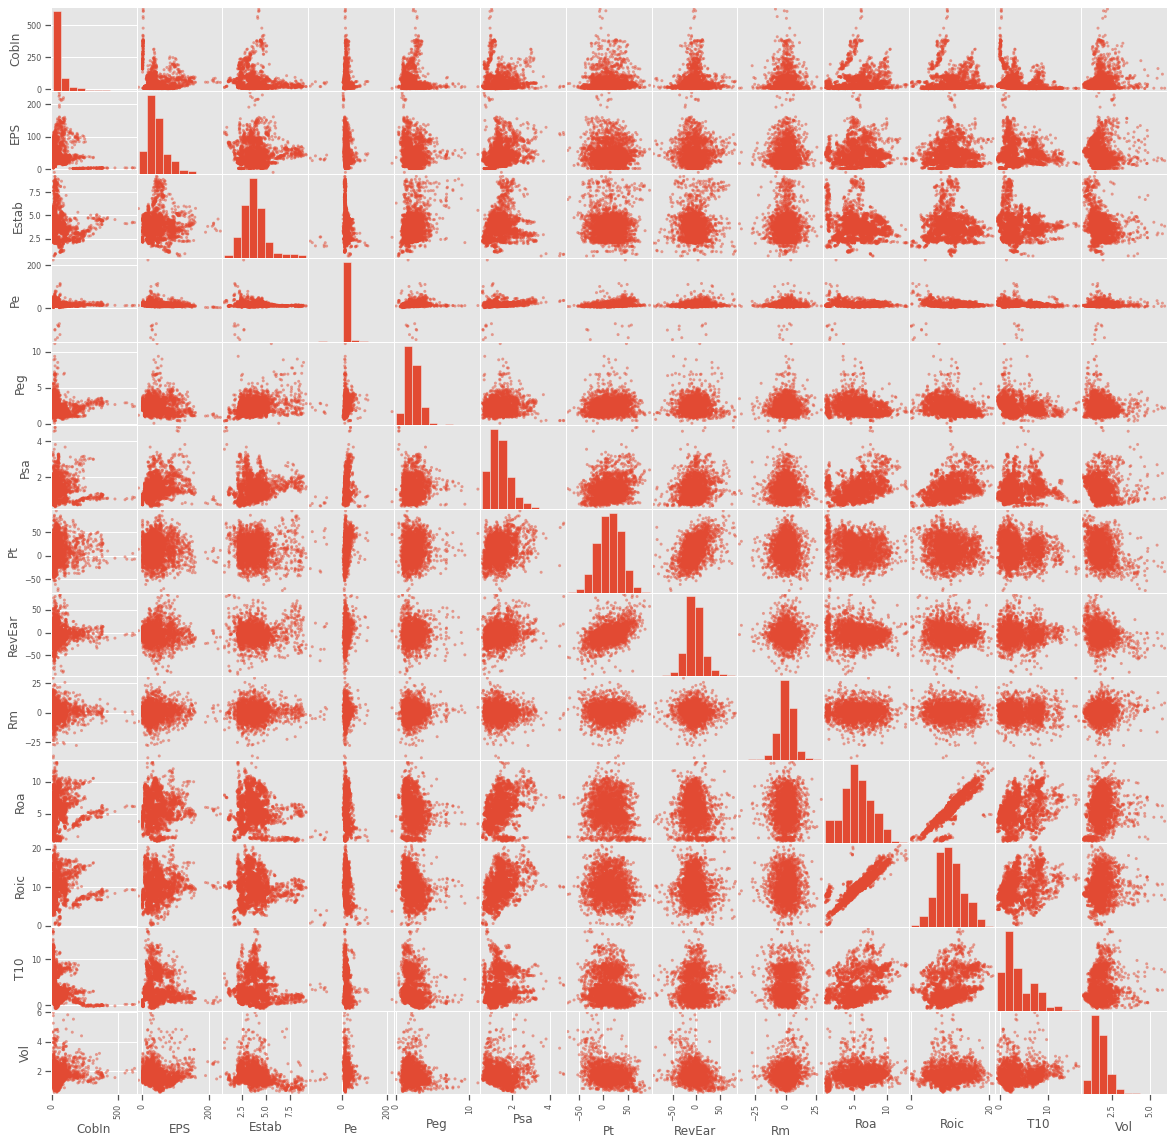

In [95]:
pd.plotting.scatter_matrix(df, figsize=(20, 20));

In [17]:
numerical_columns = ["CobIn","EPS","Estab","Pe","Peg","Psa","Pt","RevEar","Rm","Roa","Roic","T10","Vol"]
categorical_columns = ["País"]

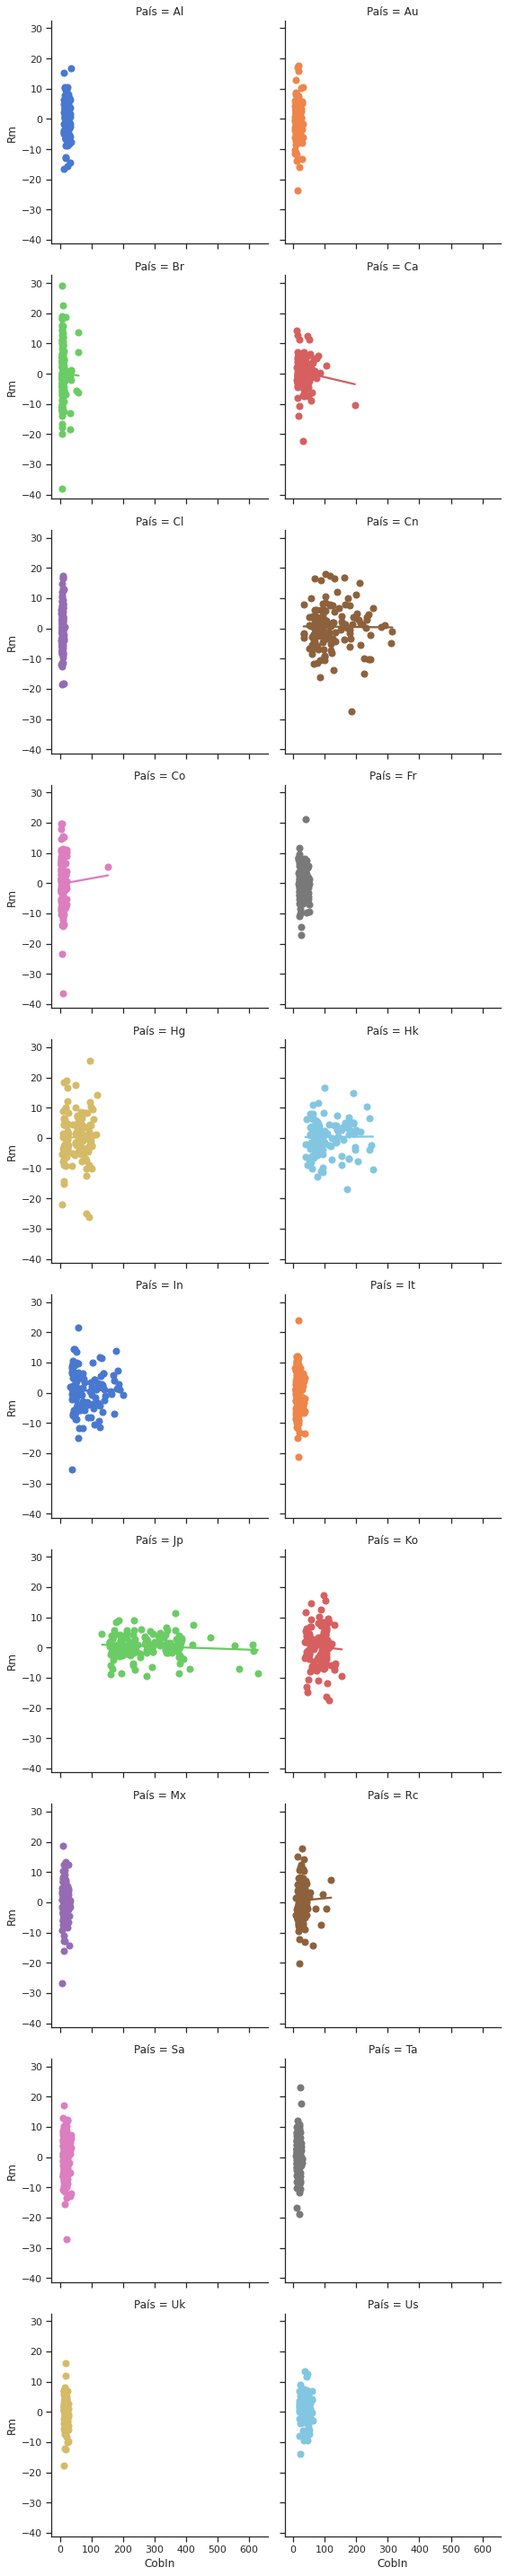

In [96]:
sns.set(style="ticks")
sns.lmplot(x="CobIn", y="Rm", col="País", hue="País", data= df,
               col_wrap=2, ci=None, palette="muted", height=4,
               scatter_kws={"s": 50, "alpha": 1});

In [103]:
X = df.drop(["Rm","key","Fecha"], axis=1)

y = df["Rm"]#Target o objetivo

In [104]:
X = X.reset_index()

In [105]:
X

,Fecha,País,CobIn,EPS,Estab,Pe,Peg,Psa,Pt,RevEar,Roa,Roic,T10,Vol
0,01-06-2022,Al,30.409946,50.723880,3.603560,9.630703,2.111726,0.721575,-21.414190,-4.426645,4.555982,8.324617,1.4400,2.084092
1,01-06-2022,Au,26.263432,136.537164,2.993252,15.052067,4.420376,1.617911,-31.039829,-7.515292,8.133350,12.197991,3.6600,1.938329
2,01-06-2022,Br,7.073927,54.306186,2.482950,6.258359,1.162602,0.941023,-13.350053,1.108276,9.584759,16.033178,13.1058,2.022834
3,01-06-2022,Ca,72.203879,102.302330,5.244425,8.604600,1.626919,1.697559,-24.578831,-27.046469,1.520313,9.879633,3.2100,1.308801
4,01-06-2022,Cl,12.088512,38.930446,2.414352,5.426070,1.568771,0.689270,14.647564,41.490459,7.519950,11.279389,6.4200,2.072950
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2755,01-01-2011,Rc,21.895549,74.555906,4.143288,11.026953,1.625462,2.080421,8.647874,53.998407,7.936057,14.901922,3.9900,1.345262
2756,01-01-2011,Sa,11.443511,18.810215,3.030925,17.954356,1.548491,1.553555,40.419566,-10.142687,7.510760,14.798120,8.6400,1.336107
2757,01-01-2011,Ta,11.522300,7.103256,4.891676,14.822287,1.356815,1.255354,39.621969,-2.720622,6.875089,11.820616,3.8900,2.066826
2758,01-01-2011,Uk,19.982597,46.684326,3.283896,15.498277,1.570580,1.123565,38.138914,-3.547263,5.693349,10.185890,3.7500,1.594375


In [100]:
#y = pd.DataFrame(data=y)
y = y.reset_index()


In [101]:
y = y.drop(["Fecha"], axis=1)

In [102]:
y.head()


,Rm
0,-1.776966
1,0.379201
2,-3.496322
3,-1.581676
4,-2.303625


In [106]:
print("Los valores únicos del país",df.País.unique())
pais_map = {'Al':1,'Au':2,'Br':3,'Ca':4, 'Cl':5,'Cn':6,'Co':6,'Fr':7, 'Hg':8, 'Hk':9, 'In':10, 'It':11, 'Jp': 12, 'Ko':12,'Mx':13,'Rc':14,'Sa':15, 'Ta':16, 'Uk':17, 'Us':18}

Los valores únicos del país ['Al' 'Au' 'Br' 'Ca' 'Cl' 'Cn' 'Co' 'Fr' 'Hg' 'Hk' 'In' 'It' 'Jp' 'Ko'
 'Mx' 'Rc' 'Sa' 'Ta' 'Uk' 'Us']


In [107]:
X['País']= X['País'].map(pais_map)
X.head()
#print("Los valores únicos del país",X.País.unique())

,Fecha,País,CobIn,EPS,Estab,Pe,Peg,Psa,Pt,RevEar,Roa,Roic,T10,Vol
0,01-06-2022,1,30.409946,50.723880,3.603560,9.630703,2.111726,0.721575,-21.414190,-4.426645,4.555982,8.324617,1.4400,2.084092
1,01-06-2022,2,26.263432,136.537164,2.993252,15.052067,4.420376,1.617911,-31.039829,-7.515292,8.133350,12.197991,3.6600,1.938329
2,01-06-2022,3,7.073927,54.306186,2.482950,6.258359,1.162602,0.941023,-13.350053,1.108276,9.584759,16.033178,13.1058,2.022834
3,01-06-2022,4,72.203879,102.302330,5.244425,8.604600,1.626919,1.697559,-24.578831,-27.046469,1.520313,9.879633,3.2100,1.308801
4,01-06-2022,5,12.088512,38.930446,2.414352,5.426070,1.568771,0.689270,14.647564,41.490459,7.519950,11.279389,6.4200,2.072950


In [108]:
print("Los valores únicos del país",X.País.unique())

Los valores únicos del país [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18]


In [109]:
X['year'] = pd.DatetimeIndex(X['Fecha']).year

In [110]:
X = X.drop(["Fecha"], axis=1)

In [111]:
X.head()

,País,CobIn,EPS,Estab,Pe,Peg,Psa,Pt,RevEar,Roa,Roic,T10,Vol,year
0,1,30.409946,50.723880,3.603560,9.630703,2.111726,0.721575,-21.414190,-4.426645,4.555982,8.324617,1.4400,2.084092,2022
1,2,26.263432,136.537164,2.993252,15.052067,4.420376,1.617911,-31.039829,-7.515292,8.133350,12.197991,3.6600,1.938329,2022
2,3,7.073927,54.306186,2.482950,6.258359,1.162602,0.941023,-13.350053,1.108276,9.584759,16.033178,13.1058,2.022834,2022
3,4,72.203879,102.302330,5.244425,8.604600,1.626919,1.697559,-24.578831,-27.046469,1.520313,9.879633,3.2100,1.308801,2022
4,5,12.088512,38.930446,2.414352,5.426070,1.568771,0.689270,14.647564,41.490459,7.519950,11.279389,6.4200,2.072950,2022


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """Entry point for launching an IPython kernel.


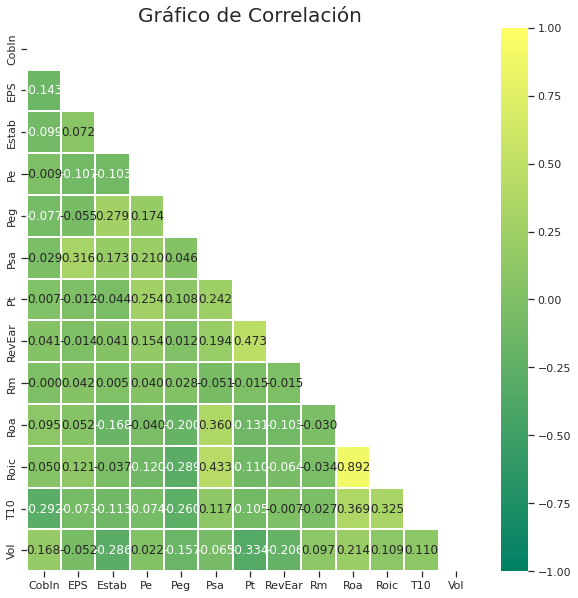

In [115]:
mask = np.triu(np.ones_like(df.corr(), dtype=np.bool))

plt.figure(figsize = (10,10))
plt.title("Gráfico de Correlación", size=20)
sns.heatmap(df.corr(),annot=True, fmt=".3f",
            vmin=-1, vmax=1, linewidth = 1,
            center=0, mask=mask,cmap="summer");

# Entrenamiento


In [112]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=2021)

In [113]:
print("Datos originales",X.shape)
print("Datos para el entrenamiento",X_train.shape)
print("Datos para prueba",X_test.shape)
print(y_train.shape)
print(y_test.shape)

Datos originales (2760, 14)
Datos para el entrenamiento (2208, 14)
Datos para prueba (552, 14)
(2208,)
(552,)


In [119]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
#scaling the training set
X_train = sc.fit_transform(X_train)
#scaling the test set
X_test = sc.transform (X_test)

In [117]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [118]:
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
  
#  VIF para cada covariable/feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
vif_data

,feature,VIF
0,País,5.543901
1,CobIn,1.942623
2,EPS,3.745919
3,Estab,12.865451
4,Pe,4.211619
5,Peg,9.279731
6,Psa,12.733098
7,Pt,2.086927
8,RevEar,1.410926
9,Roa,44.919803


## PCA

In [66]:
# Applying PCA function on training
# and testing set of X component
from sklearn.decomposition import PCA
 
pca = PCA(n_components = 2)
 
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
 
explained_variance = pca.explained_variance_ratio_

In [68]:
explained_variance

array([0.20351467, 0.15289801])

## KNN

In [120]:
#llamo al objeto o a la función 
KNN_reg = KNeighborsRegressor(n_neighbors=5)
# Entrenamiento de lo modelo 
regressor = KNN_reg.fit(X_train, y_train)
#Predición de modelo
y_pred_knn = regressor.predict(X_test)

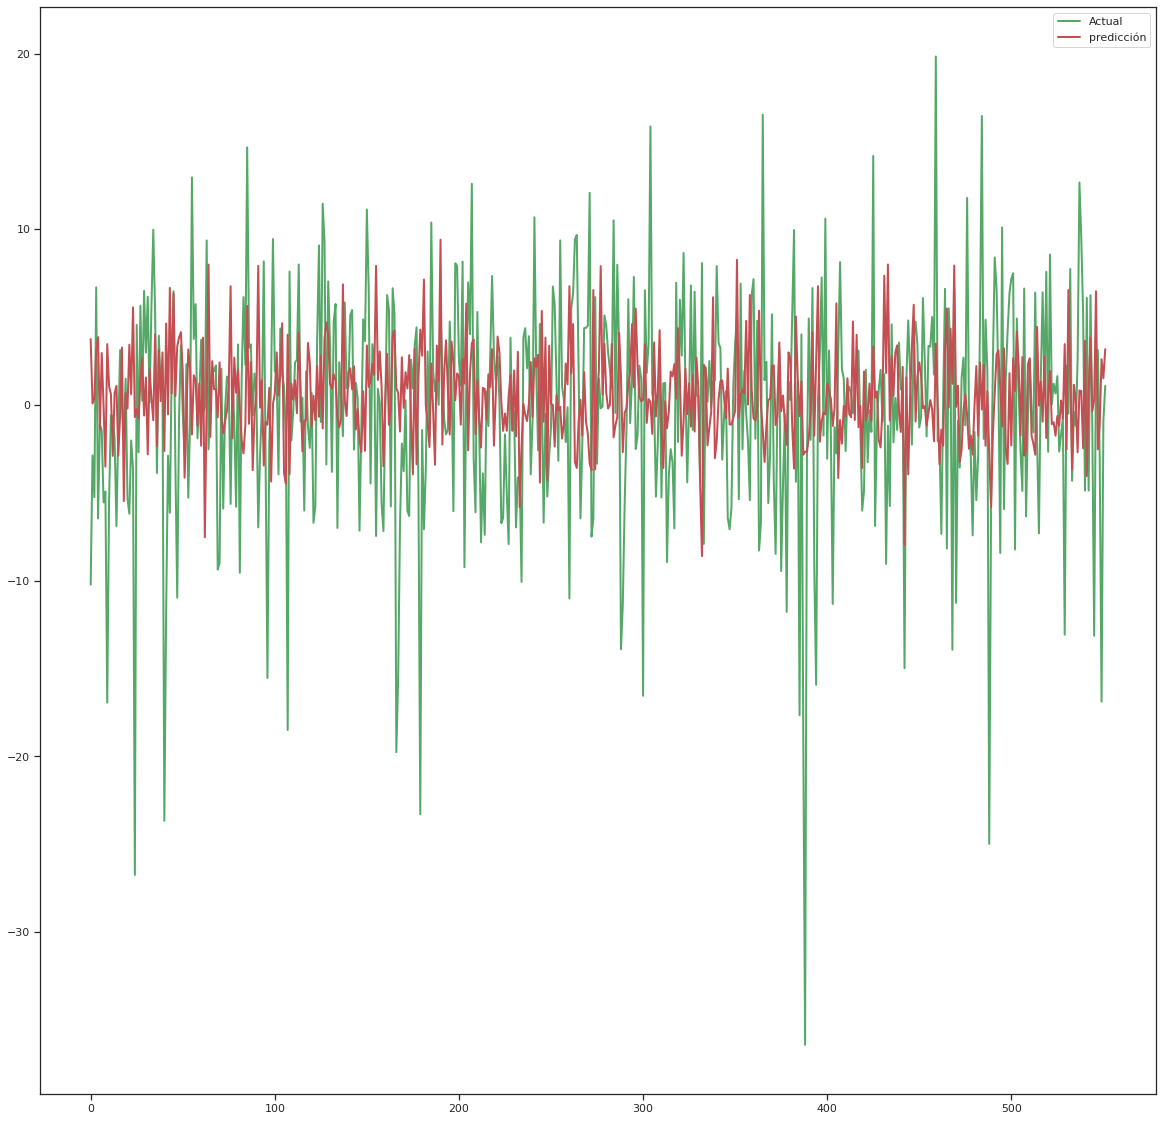

In [123]:
plt.figure(figsize=(20, 20))
plt.plot(list(y_test),  c="g", label="Actual", linewidth=2)
plt.plot(y_pred_knn, c="r", label="predicción", linewidth=2)
plt.legend(loc='best')
plt.show();

In [124]:
# The mean squared error
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import metrics
print ("Mean Absolute Error:" , metrics.mean_absolute_error(y_test, y_pred_knn))
print ("Mean Squared Error:" , metrics.mean_squared_error(y_test, y_pred_knn))
print ("Root Mean Squared Error:" , np.sqrt(metrics.mean_squared_error(y_test, y_pred_knn)))
print('Coefficient of determination: %.2f'% r2_score(y_test, y_pred_knn))

Mean Absolute Error: 5.1297163811177535
Mean Squared Error: 47.01224732845743
Root Mean Squared Error: 6.856547770449604
Coefficient of determination: -0.19


In [125]:
from sklearn import neighbors
from sklearn.metrics import mean_squared_error 
from math import sqrt
import matplotlib.pyplot as plt
%matplotlib inline

rmse_val = [] #para almacenar valores rmse para diferentes k
for K in range(20):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)

    model.fit(X_train, y_train)  #fit the model
    pred=model.predict(X_test) #hacer predicciones en el equipo de prueba
    error = sqrt(mean_squared_error(y_test,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('Valor de RMSE para k= ' , K , 'es:', error)

Valor de RMSE para k=  1 es: 8.616339925418684
Valor de RMSE para k=  2 es: 7.524706003465669
Valor de RMSE para k=  3 es: 7.093488022782404
Valor de RMSE para k=  4 es: 6.937382080000389
Valor de RMSE para k=  5 es: 6.856547770449604
Valor de RMSE para k=  6 es: 6.783257015377183
Valor de RMSE para k=  7 es: 6.691395384474682
Valor de RMSE para k=  8 es: 6.6695395426756
Valor de RMSE para k=  9 es: 6.655896946780995
Valor de RMSE para k=  10 es: 6.5501406701966305
Valor de RMSE para k=  11 es: 6.532081515929245
Valor de RMSE para k=  12 es: 6.536822253837323
Valor de RMSE para k=  13 es: 6.47723663394683
Valor de RMSE para k=  14 es: 6.478094845168815
Valor de RMSE para k=  15 es: 6.462683270843227
Valor de RMSE para k=  16 es: 6.46222434803966
Valor de RMSE para k=  17 es: 6.454011132131285
Valor de RMSE para k=  18 es: 6.420450164423133
Valor de RMSE para k=  19 es: 6.44011240687979
Valor de RMSE para k=  20 es: 6.426370596809079


Text(0, 0.5, 'Error Rate')

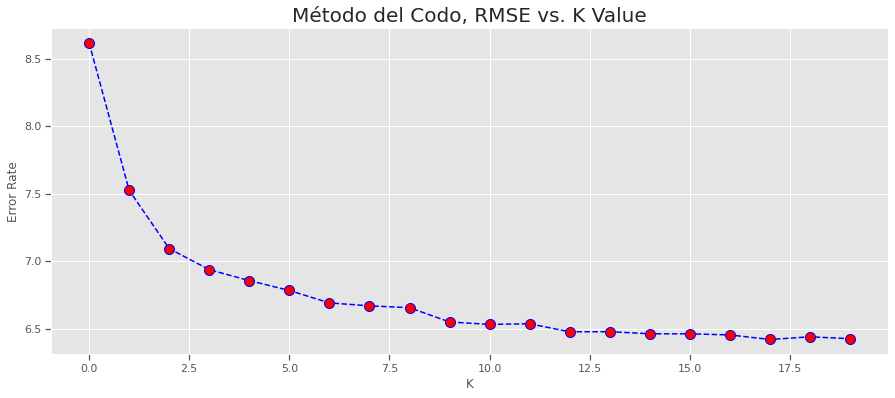

In [126]:
plt.style.use('ggplot')

plt.figure(figsize=(15,6))
plt.plot(rmse_val ,color="blue", linestyle="dashed", marker="o", markerfacecolor="red", markersize=10)
plt.title('Método del Codo, RMSE vs. K Value', size=20)
plt.xlabel('K')
plt.ylabel('Error Rate')


## Linear Regression

In [129]:
from sklearn.linear_model import LinearRegression

linear_model = LinearRegression(normalize=False).fit(X_train, y_train)
print('Puntaje Entrenamiento: ', linear_model.score(X_train, y_train))

Puntaje Entrenamiento:  0.029941783274369138


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:155: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  FutureWarning,


In [131]:
from sklearn.metrics import r2_score
y_pred = linear_model.predict(X_test)
print('Puntaje Testing: ', r2_score(y_test, y_pred))

Puntaje Testing:  -0.0028212472795767773


In [135]:
X_train = pd.DataFrame(data=X_train)

In [136]:
predictors = X_train.columns
coef = pd.Series(linear_model.coef_, predictors).sort_values()

In [138]:
print(coef)

6    -0.640213
9    -0.625620
13   -0.200272
1     0.036082
11    0.072852
8     0.110368
3     0.143042
0     0.162442
7     0.230957
5     0.273678
4     0.440204
10    0.491628
2     0.620286
12    0.944065
dtype: float64


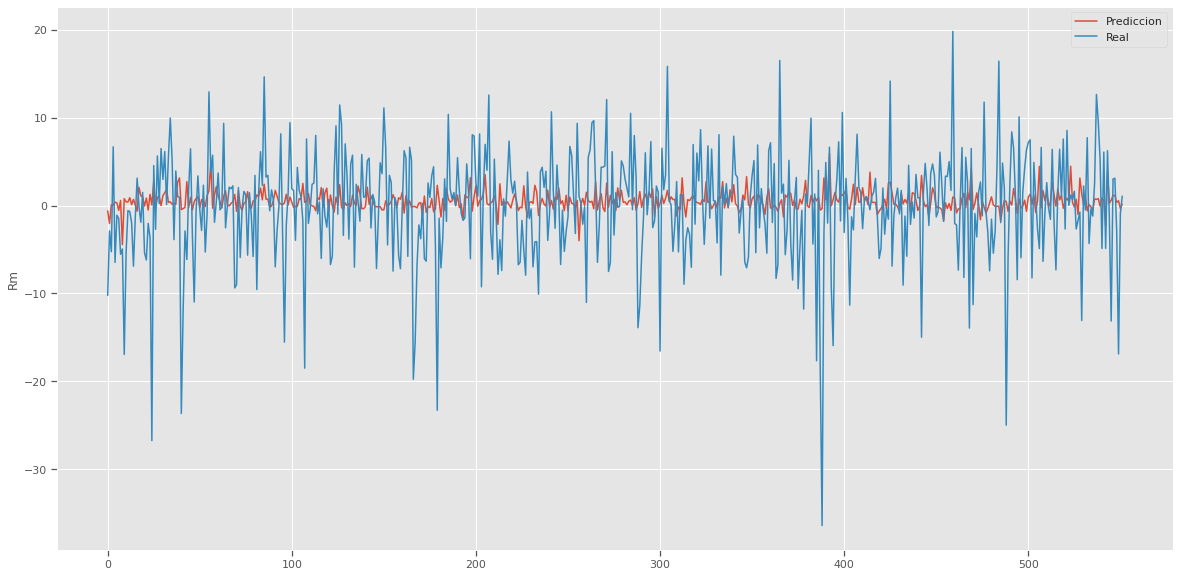

In [141]:
plt.figure(figsize = (20,10))

plt.plot(y_pred, label='Prediccion')
plt.plot(y_test.values, label='Real')

plt.ylabel('Rm')

plt.legend()
plt.show()

## Lasso, Ridge, ElasticNet

In [142]:
from sklearn.metrics import r2_score
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet

In [143]:
def build_model(regression_fn,name_of_y_col, names_of_x_cols, dataset, 
                test_frac=0.2,
                preprocess_fn=None)

SyntaxError: ignored